In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

WEB SCRAPING


   Creating URL to collect links from paginated data

   Collecting HTML data from this page

   Parsing content

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")


    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    response = requests.get(url)


    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,"Not Verified | On March 1st, I flew from Ber..."
1,Not Verified | The WORST customer experience! ...
2,Not Verified | Had to cancel my flight month...
3,✅ Trip Verified | Flight cancelled with no rea...
4,✅ Trip Verified | This is a route I fly regula...
5,✅ Trip Verified | While BA may have made some...
6,✅ Trip Verified | British Airways new Club Sui...
7,"✅ Trip Verified | Four very pleasant, on time..."
8,Not Verified | We travel extensively over 25...
9,✅ Trip Verified | Flight delayed an hour due ...


In [4]:
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/BA_reviews.csv")


Now we have a dataset of 1000 reviews of people who travelled through British Airways

Data Cleaning

In [5]:
import pandas as pd


df = pd.read_csv("/content/data/BA_reviews.csv")
df.head()


,Unnamed: 0,reviews
0,0,"Not Verified | On March 1st, I flew from Ber..."
1,1,Not Verified | The WORST customer experience! ...
2,2,Not Verified | Had to cancel my flight month...
3,3,✅ Trip Verified | Flight cancelled with no rea...
4,4,✅ Trip Verified | This is a route I fly regula...


a. Remove Unnecessary Text

 Remove '✅ Trip Verified | ' and 'Not Verified | ' from reviews


In [6]:

df['reviews'] = df['reviews'].str.replace('✅ Trip Verified | ', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified | ', '', regex=False)
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | On March 1st, I flew from Ber..."
1,1,The WORST customer experience! British Airways...
2,2,Not Verified | Had to cancel my flight month...
3,3,Flight cancelled with no reason given less tha...
4,4,This is a route I fly regularly. Used first cl...


b. Remove Extra Whitespaces


Clean up any leading or trailing spaces:





In [7]:
df['reviews'] = df['reviews'].str.strip()


In [8]:
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | On March 1st, I flew from Ber..."
1,1,The WORST customer experience! British Airways...
2,2,Not Verified | Had to cancel my flight month...
3,3,Flight cancelled with no reason given less tha...
4,4,This is a route I fly regularly. Used first cl...


c. Handle Missing Values

Check for and handle missing values if necessary:

Drop rows with missing values in 'reviews' column (if any)

In [9]:

print(df.isnull().sum())


df = df.dropna(subset=['reviews'])

Unnamed: 0    0
reviews       0
dtype: int64


# **Exploratory Data Analysis**

a. Wordcloud

Generating
 a word cloud to visualize the most common words in the reviews.

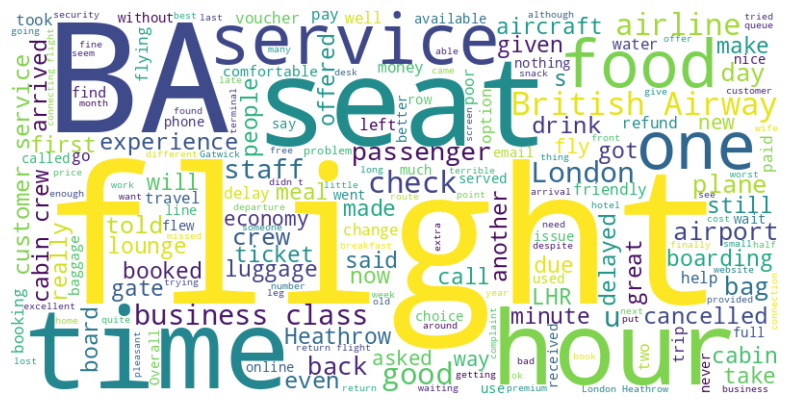

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['reviews'])

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


b. Sentiment Analysis

Performing sentiment analysis to determine the overall sentiment of the reviews.

In [11]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['reviews'].apply(get_sentiment)


print(df.head())


   Unnamed: 0                                            reviews  sentiment
0           0  Not Verified |   On March 1st, I flew from Ber...   0.028333
1           1  The WORST customer experience! British Airways...   0.021528
2           2  Not Verified |   Had to cancel my flight month...   0.112500
3           3  Flight cancelled with no reason given less tha...  -0.424074
4           4  This is a route I fly regularly. Used first cl...   0.256863


Analyze Sentiment Distribution:

Check the distribution of sentiment scores to understand the overall sentiment trend in the reviews.

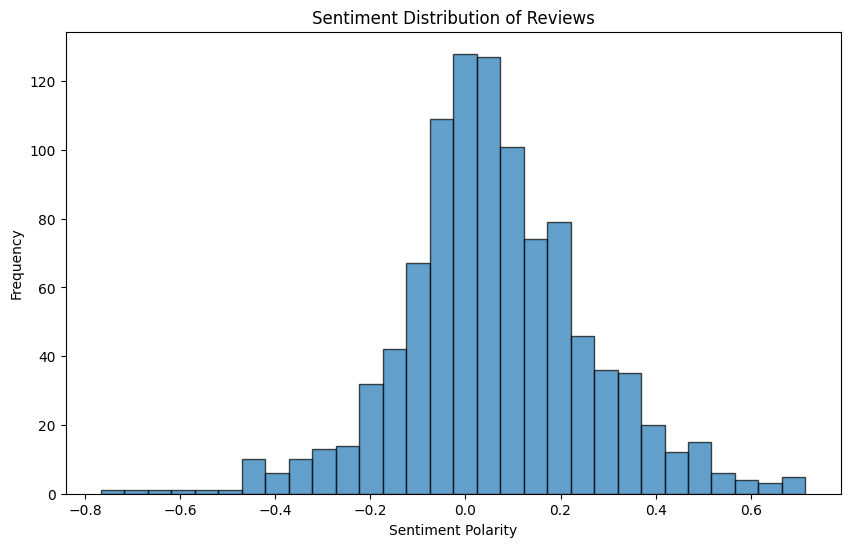

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


Sentiment by Verification Status:

If you want to analyze how sentiment differs between verified and non-verified reviews, you could separate the reviews based on their verification status and compare their sentiment.

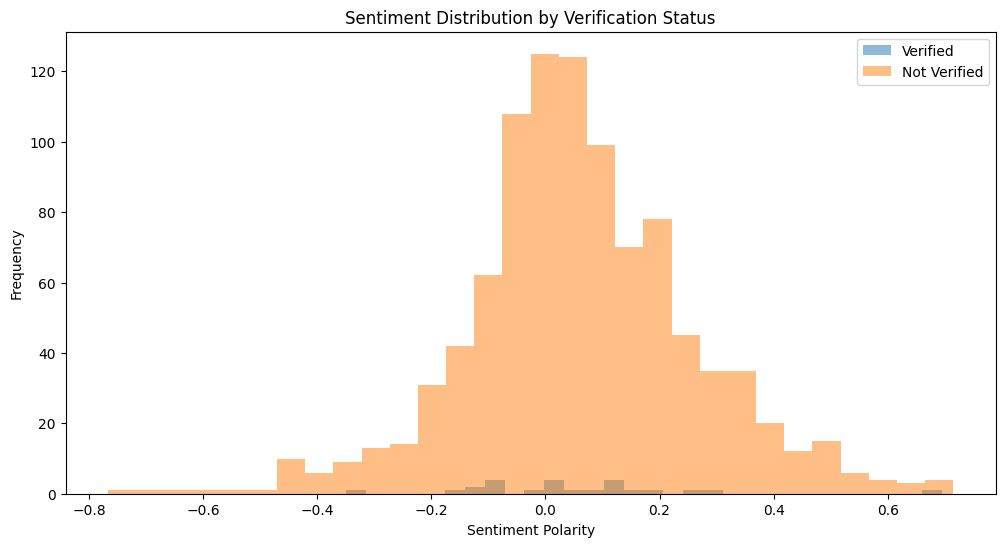

In [13]:
# Assuming 'reviews' column still contains 'Verified' and 'Not Verified'
df['verification_status'] = df['reviews'].str.contains('Verified', na=False)

# Analyze sentiment for verified and non-verified reviews
verified_sentiments = df[df['verification_status']]['sentiment']
not_verified_sentiments = df[~df['verification_status']]['sentiment']

plt.figure(figsize=(12, 6))
plt.hist(verified_sentiments, bins=30, alpha=0.5, label='Verified')
plt.hist(not_verified_sentiments, bins=30, alpha=0.5, label='Not Verified')
plt.title('Sentiment Distribution by Verification Status')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Generating Word Cloud:

Using the sentiment data to create a word cloud for positive and negative reviews separately.

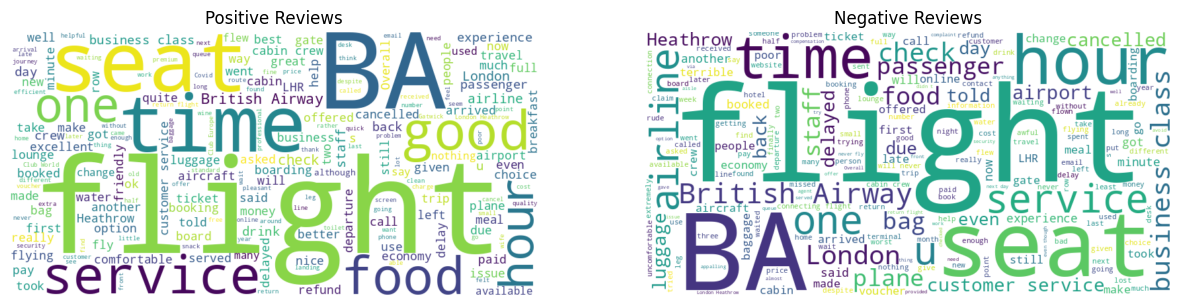

In [14]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] > 0]['reviews'])
negative_reviews = ' '.join(df[df['sentiment'] < 0]['reviews'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


c. Topic Modeling

For topic modeling, using the Latent Dirichlet Allocation (LDA) model from sklearn.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()


Topic #0:
['told', 'time', 'customer', 'hours', 'airways', 'british', 'london', 'service', 'ba', 'flight']

Topic #1:
['service', 'crew', 'cabin', 'economy', 'seats', 'seat', 'business', 'class', 'ba', 'flight']

Topic #2:
['staff', 'class', 'cabin', 'time', 'crew', 'good', 'food', 'service', 'flight', 'ba']

Topic #3:
['ba', 'delayed', 'delay', 'late', 'gate', 'lhr', 'luggage', 'airport', 'staff', 'flight']

Topic #4:
['cabin', 'lounge', 'club', 'seat', 'service', 'time', 'crew', 'food', 'good', 'flight']



In [16]:
import numpy as np

doc_topic_dist = lda.transform(X)

df['topic'] = np.argmax(doc_topic_dist, axis=1)


In [17]:
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

Topic #0:
['told', 'time', 'customer', 'hours', 'airways', 'british', 'london', 'service', 'ba', 'flight']

Topic #1:
['service', 'crew', 'cabin', 'economy', 'seats', 'seat', 'business', 'class', 'ba', 'flight']

Topic #2:
['staff', 'class', 'cabin', 'time', 'crew', 'good', 'food', 'service', 'flight', 'ba']

Topic #3:
['ba', 'delayed', 'delay', 'late', 'gate', 'lhr', 'luggage', 'airport', 'staff', 'flight']

Topic #4:
['cabin', 'lounge', 'club', 'seat', 'service', 'time', 'crew', 'food', 'good', 'flight']



Topic Distribution Across Documents:

Calculate the proportion of documents belonging to each topic.

Identify which topics are most prevalent or least common.

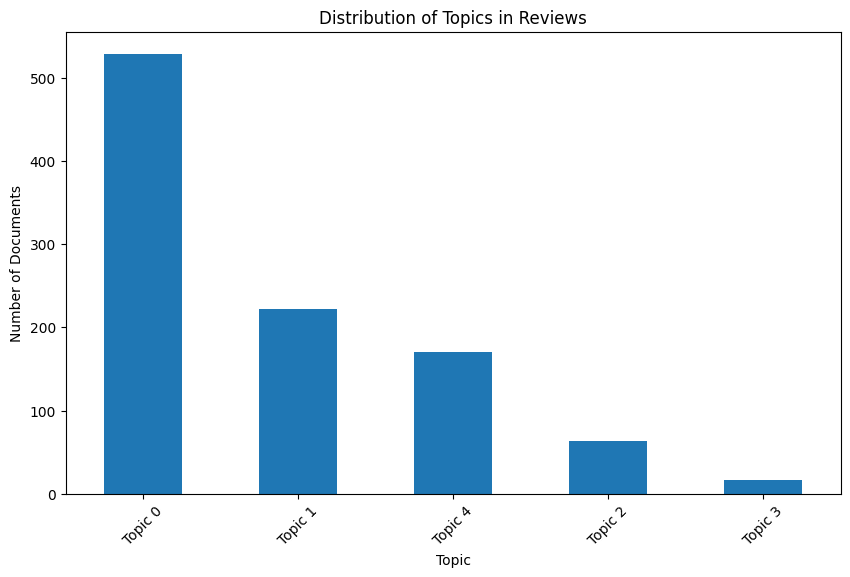

In [18]:
import matplotlib.pyplot as plt

topic_counts = df['topic'].value_counts()

plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Distribution of Topics in Reviews')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(ticks=range(len(topic_counts)), labels=[f'Topic {i}' for i in topic_counts.index], rotation=45)
plt.show()

exploratory data analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   reviews              1000 non-null   object 
 2   sentiment            1000 non-null   float64
 3   verification_status  1000 non-null   bool   
 4   topic                1000 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.4+ KB


Predictive modeling of customer bookings

In [42]:
import pandas as pd


cust_booking = pd.read_csv("/content/customer_booking.csv", encoding='ISO-8859-1')
cust_booking.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [43]:
cust_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 


- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [44]:
cust_booking['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [45]:
print(cust_booking.columns)


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [46]:
mappin = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}
cust_booking['flight_day'] = cust_booking['flight_day'].map(mappin)

In [47]:
cust_booking['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [49]:
cust_booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

HISTOGRAM

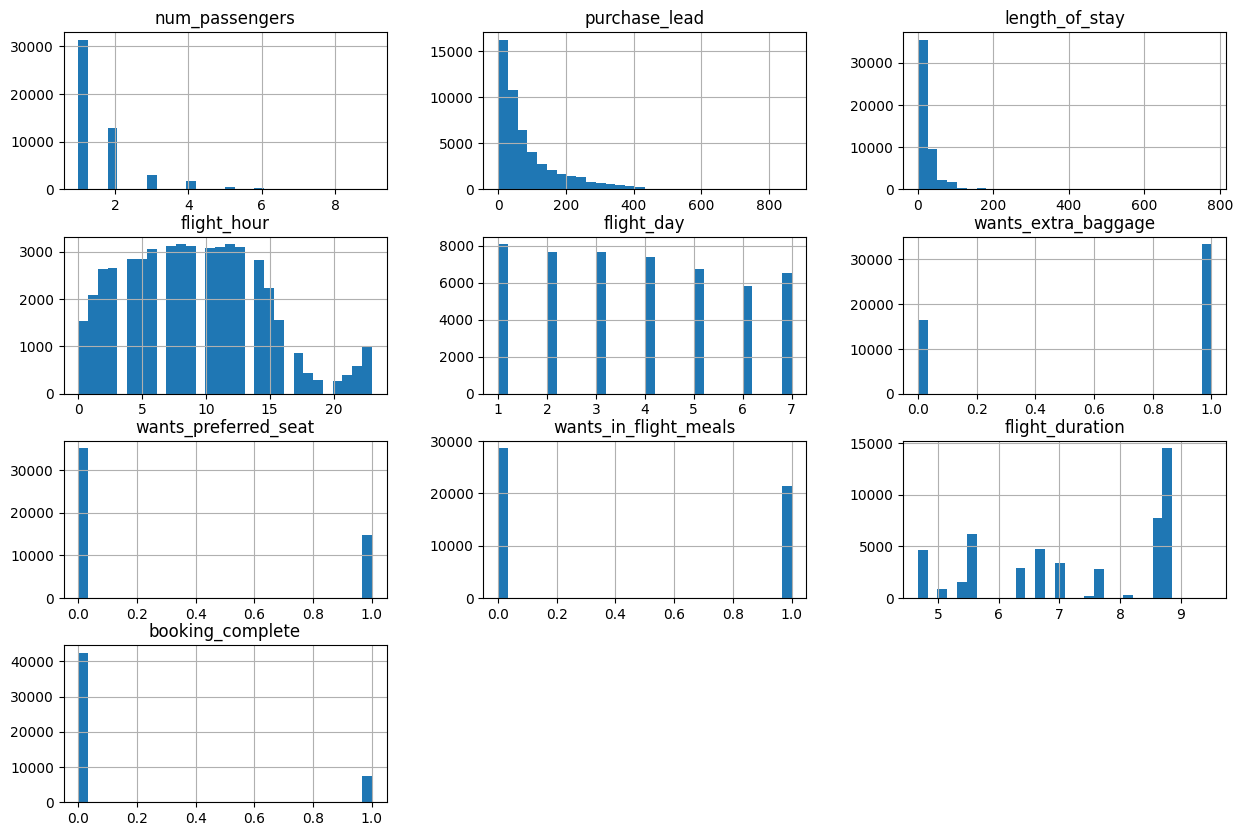

In [51]:
cust_booking.hist(bins=30, figsize=(15, 10))
plt.show()

CORELATION MATRIX

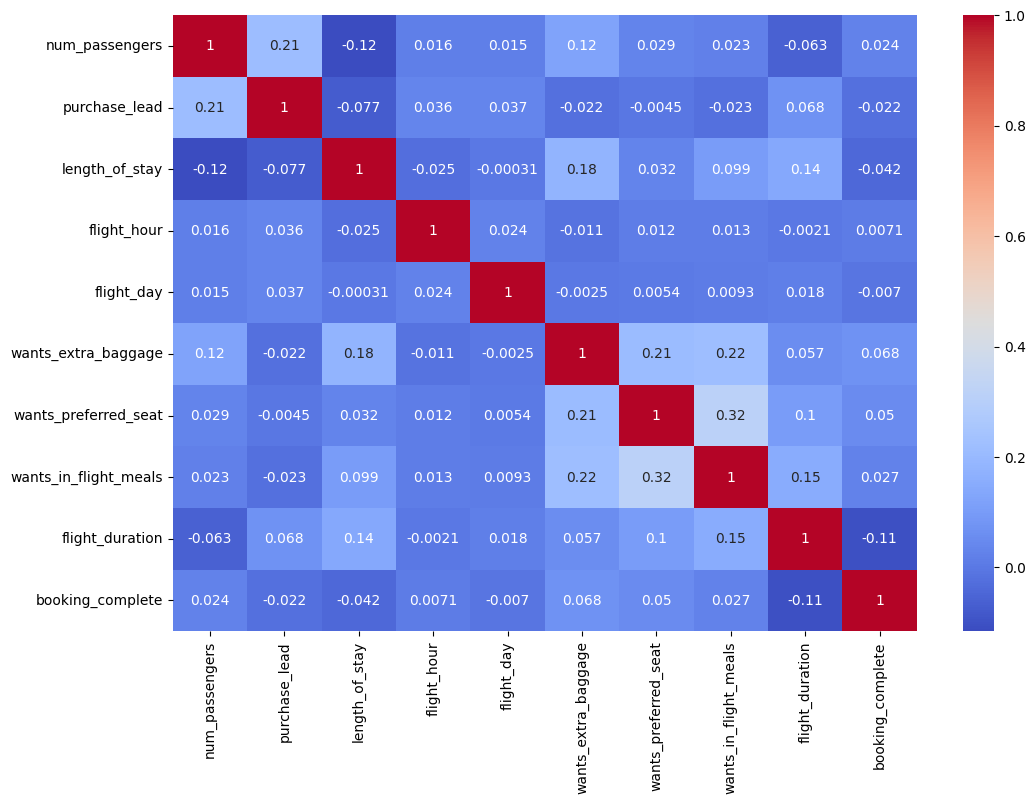

In [53]:
cust_booking = pd.get_dummies(cust_booking, drop_first=True)

numeric_df = cust_booking.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()
cust_booking.fillna(cust_booking.median(), inplace=True)


PREDICTIVE MODELLING

In [54]:
cust_booking.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,6,0,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,3,1,1,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,6,0,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,3,1,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False


In [55]:
cust_booking.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=914)

In [56]:
X = cust_booking.drop('booking_complete', axis=1)
y = cust_booking['booking_complete']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [61]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" \n Classification Report:\n\n", classification_report(y_test, y_pred))

Accuracy: 0.8510666666666666
Confusion Matrix:
 [[12475   309]
 [ 1925   291]]
 
 Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92     12784
           1       0.48      0.13      0.21      2216

    accuracy                           0.85     15000
   macro avg       0.68      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000



feature_importances

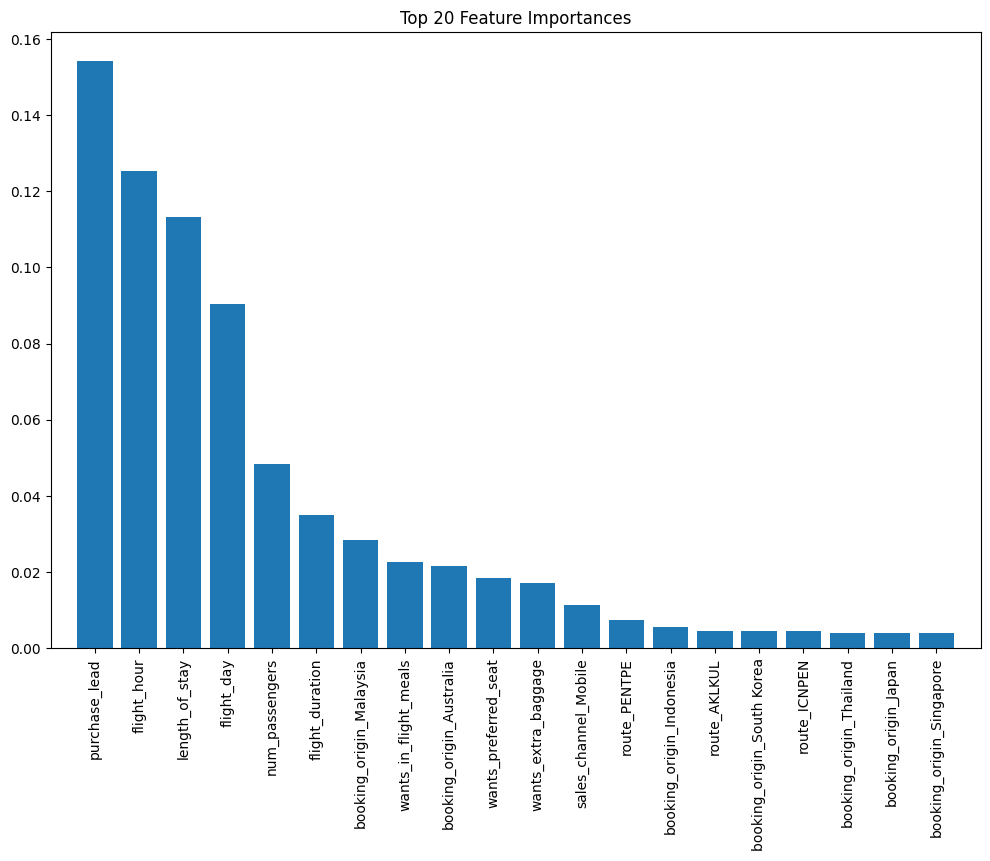

In [64]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 20
plt.figure(figsize=(12, 8))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.xlim([-1, top_n])
plt.show()

Evaluation

• The most important variable in the model was
purchase_lead, that is the time between purchase and
departure.

• Information about the flight, e.g. flight time and
duration was also significant, however booking origin of
the customer was not important.

• The accuracy of the model was approximately 0.7
(Precision) and 0.003 (Recall), showing that this model
requires more improvement. I suggest adding more
customer-centric features into the model.